# Imports

In [1]:
import torch
from depth_anything_3.api import DepthAnything3

[WARN ] Dependency `gsplat` is required for rendering 3DGS. Install via: pip install git+https://github.com/nerfstudio-project/gsplat.git@0b4dddf04cb687367602c01196913cde6a743d70


In [2]:
torch.cuda.is_available()

True

In [21]:
# Load model from Hugging Face Hub
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DepthAnything3.from_pretrained("depth-anything/DA3NESTED-GIANT-LARGE")
model = model.to(device=device)
model.eval()

config.json: 0.00B [00:00, ?B/s]

[INFO ] using SwiGLU layer as FFN
[INFO ] using MLP layer as FFN


model.safetensors:   0%|          | 0.00/6.76G [00:00<?, ?B/s]

DepthAnything3(
  (model): NestedDepthAnything3Net(
    (da3): DepthAnything3Net(
      (backbone): DinoV2(
        (pretrained): DinoVisionTransformer(
          (patch_embed): PatchEmbed(
            (proj): Conv2d(3, 1536, kernel_size=(14, 14), stride=(14, 14))
            (norm): Identity()
          )
          (rope): RotaryPositionEmbedding2D()
          (blocks): ModuleList(
            (0-12): 13 x Block(
              (norm1): LayerNorm((1536,), eps=1e-06, elementwise_affine=True)
              (attn): Attention(
                (qkv): Linear(in_features=1536, out_features=4608, bias=True)
                (q_norm): Identity()
                (k_norm): Identity()
                (attn_drop): Dropout(p=0.0, inplace=False)
                (proj): Linear(in_features=1536, out_features=1536, bias=True)
                (proj_drop): Dropout(p=0.0, inplace=False)
              )
              (ls1): LayerScale(1536, init_values=1.0, inplace=False)
              (drop_path1): Identity

In [4]:
import os

In [11]:
image = [os.path.join(os.getcwd(), 'CamVid', 'train', '0001TP_009210.png')]

In [12]:
prediction = model.inference(image)

[INFO ] Processed Images Done taking 0.8934204578399658 seconds. Shape:  torch.Size([1, 3, 378, 504])
[INFO ] Model Forward Pass Done. Time: 9.534186363220215 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0024340152740478516 seconds


In [22]:
prediction = model.inference(image)

[INFO ] Processed Images Done taking 0.2850339412689209 seconds. Shape:  torch.Size([1, 3, 378, 504])
[INFO ] Model Forward Pass Done. Time: 5.1678221225738525 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0017266273498535156 seconds


In [23]:
prediction.depth[0].shape

(378, 504)

In [15]:
import matplotlib.pyplot as plt

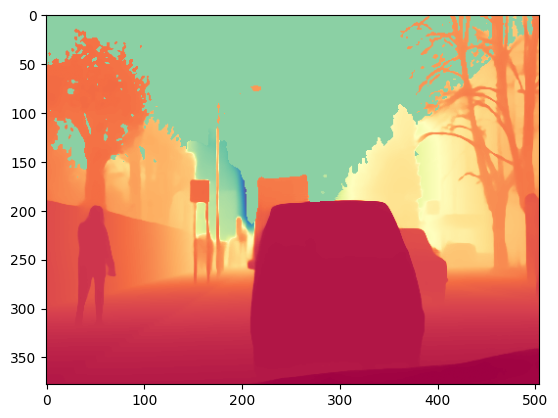

In [26]:
plt.imshow(prediction.depth[0], cmap='Spectral')

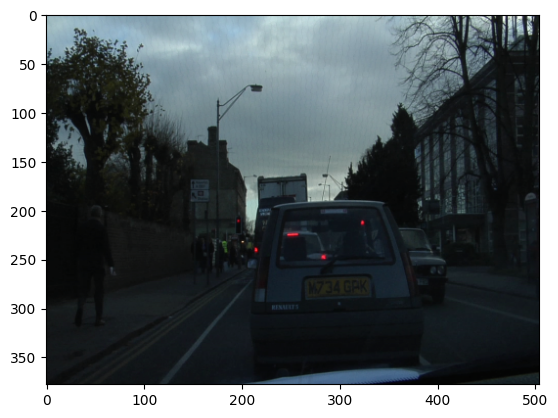

In [25]:
plt.imshow(prediction.processed_images[0])

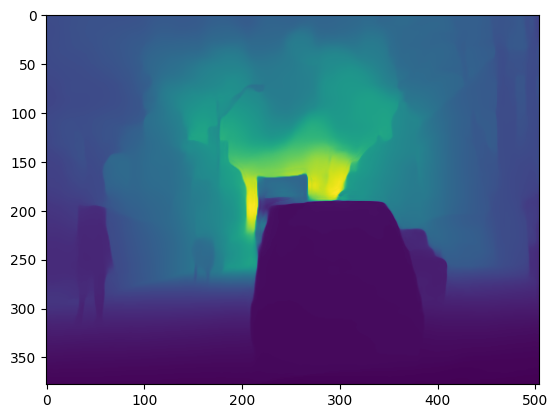

In [16]:
plt.imshow(prediction.depth[0])

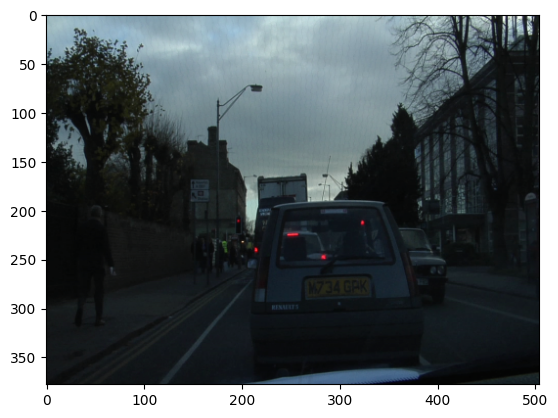

In [19]:
plt.imshow(prediction.processed_images[0])

In [27]:
cat_images = ['/home/alumno/Desktop/datos/MLOps/MLOps-Lab3/data/raw/Abyssinian_130.jpg']
prediction2 = model.inference(cat_images)

[INFO ] Processed Images Done taking 0.27303266525268555 seconds. Shape:  torch.Size([1, 3, 504, 336])
[INFO ] Model Forward Pass Done. Time: 0.23272299766540527 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0004832744598388672 seconds


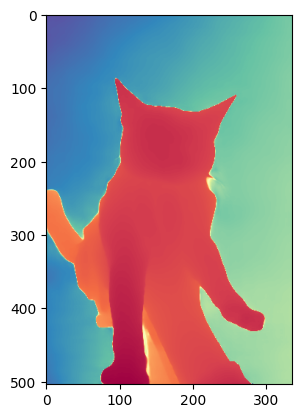

In [28]:
plt.imshow(prediction2.depth[0], cmap='Spectral')

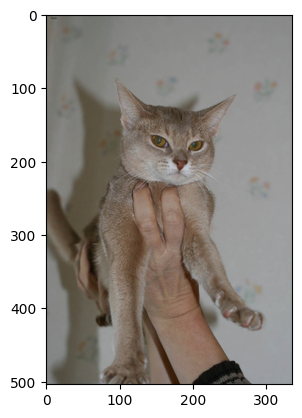

In [29]:
plt.imshow(prediction2.processed_images[0])

In [30]:
prediction_size = model.inference(
    image,
    process_res=960
)

[INFO ] Processed Images Done taking 0.0915064811706543 seconds. Shape:  torch.Size([1, 3, 714, 966])
[INFO ] Model Forward Pass Done. Time: 0.6216151714324951 seconds
[INFO ] Conversion to Prediction Done. Time: 0.003228425979614258 seconds


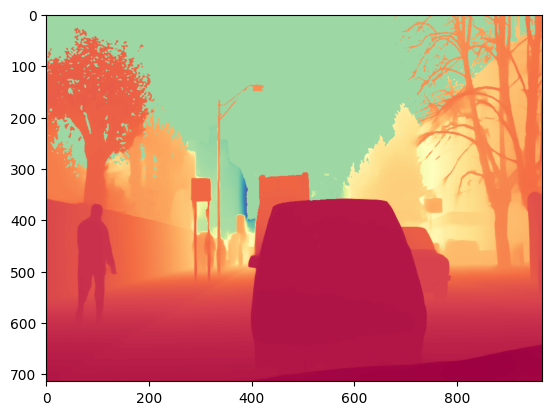

In [31]:
plt.imshow(prediction_size.depth[0], cmap='Spectral')

In [34]:
prediction_size.depth[0].min()

3.3465383

In [35]:
prediction_size.depth[0].max()

99.23362

In [36]:
prediction_size.extrinsics[0]

array([[ 1.0000000e+00, -1.9743023e-04,  7.3477422e-05,  1.0425625e-02],
       [ 1.9743809e-04,  1.0000000e+00, -1.0678901e-04,  8.1306539e-04],
       [-7.3456336e-05,  1.0680351e-04,  1.0000000e+00, -5.4377895e-03]],
      dtype=float32)

In [37]:
from depth_anything_3.utils.alignment import apply_metric_scaling

In [47]:
intrinsics = prediction2.intrinsics[0]

In [55]:
focal_length = intrinsics[0, 0]
focal_length

1107.1843

In [60]:
res = prediction_size.depth[0]

In [61]:
print(res.min(), res.max())

3.3465383 99.23362


In [59]:
pred_meters = model.inference(
    image,
    process_res=960,
    export_format='npz'
)

[INFO ] Processed Images Done taking 0.11692595481872559 seconds. Shape:  torch.Size([1, 3, 714, 966])
[INFO ] Model Forward Pass Done. Time: 0.3575143814086914 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0025310516357421875 seconds


In [62]:
print(pred_meters.depth[0].min(), pred_meters.depth[0].max())

3.347204 99.25336


In [67]:
print(pred_meters.depth[0].min() * pred_meters.intrinsics[0][0, 0] / 300.0, pred_meters.depth[0].max() * pred_meters.intrinsics[0][0, 0] / 300.0)

13.667013346354167 405.2626822916667


In [63]:
pino = ['/home/alumno/Downloads/pino.jpg']
pino_pred = model.inference(
    pino
)

[INFO ] Processed Images Done taking 0.16214442253112793 seconds. Shape:  torch.Size([1, 3, 504, 224])
[INFO ] Model Forward Pass Done. Time: 0.32085490226745605 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010840892791748047 seconds


In [64]:
print(pino_pred.depth[0].min(), pino_pred.depth[0].max())

0.64538354 1.4285374


In [68]:
pino_pred.intrinsics[0][0, 0]

282.42993

In [66]:
print(pino_pred.depth[0].min() * pino_pred.intrinsics[0][0, 0] / 300.0, pino_pred.depth[0].max() * pino_pred.intrinsics[0][0, 0] / 300.0)

0.60758544921875 1.344872334798177


In [ ]:
plt.imshow(pino

# End